# Migration between Germany and foreign countries 1991 to 2021

https://www.destatis.de/EN/Themes/Society-Environment/Population/Migration/Tables/migration-total.html

# Import Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

import warnings
import requests
from bs4 import BeautifulSoup

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 10
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
url = 'https://www.destatis.de/EN/Themes/Society-Environment/Population/Migration/Tables/migration-total.html'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html;charset=utf-8 -- Encoding: utf-8


# Parse HTML Document

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [5]:
tbody = soup.find('tbody')
trs = tbody.find_all('tr')

year = []
totarr = []
totdepart = []
totbal = []
natarr = []
natdepart = []
natbal = []
forarr = []
fordepart = []
forbal = []


for td in trs:
  year.append(td.findAll('td')[0].string)
  totarr.append(td.findAll('td')[1].string)
  totdepart.append(td.find_all('td')[2].string)
  totbal.append(td.find_all('td')[3].string)
  natarr.append(td.find_all('td')[4].string)
  natdepart.append(td.find_all('td')[5].string)
  natbal.append(td.find_all('td')[6].string)
  forarr.append(td.find_all('td')[7].string)
  fordepart.append(td.find_all('td')[8].string)
  forbal.append(td.find_all('td')[9].string)

# Create DataFrame

In [6]:
data = {
    'Year': year,
    'TotalArrivals': totarr,
    'TotalDepartures': totdepart,
    'TotalBalance': totbal,
    'NationalsArrivals': natarr,
    'NationalsDepartures': natdepart,
    'NationalsBalance': natbal,
    'ForeignersArrivals': natarr,
    'ForeignersDepartures': fordepart,
    'ForeignersBalance': forbal  
}

df = pd.DataFrame(data=data)

# Head and Tail

In [7]:
df.head()

,Year,TotalArrivals,TotalDepartures,TotalBalance,NationalsArrivals,NationalsDepartures,NationalsBalance,ForeignersArrivals,ForeignersDepartures,ForeignersBalance
0,2021,1 323 466,994 303,329 163,183 650,247 829,-64 179,183 650,746 474,393 342
1,2020,1 186 702,966 451,220 251,191 883,220 239,-28 356,191 883,746 212,248 607
2,2019,1 558 612,1 231 552,327 060,212 669,270 294,-57 625,212 669,961 258,384 685
3,2018,1 585 112,1 185 432,399 680,201 531,261 851,-60 320,201 531,923 581,460 000
4,2017,1 550 721,1 134 641,416 080,166 703,249 181,-82 478,166 703,885 460,498 558


In [8]:
df.tail()

,Year,TotalArrivals,TotalDepartures,TotalBalance,NationalsArrivals,NationalsDepartures,NationalsBalance,ForeignersArrivals,ForeignersDepartures,ForeignersBalance
26,1995,1 096 048,698 113,397 935,303 347,130 672,172 675,303 347,567 441,225 260
27,1994,1 082 553,767 555,314 998,305 037,138 280,166 757,305 037,629 275,148 241
28,1993,1 277 408,815 312,462 096,287 561,104 653,182 908,287 561,710 659,279 188
29,1992,1 502 198,720 127,782 071,290 850,105 171,185 679,290 850,614 956,596 392
30,1991,1 198 978,596 455,602 523,273 633,98 915,174 718,273 633,497 540,427 80


In [9]:
df.loc[df['Year'].isnull()]                  

,Year,TotalArrivals,TotalDepartures,TotalBalance,NationalsArrivals,NationalsDepartures,NationalsBalance,ForeignersArrivals,ForeignersDepartures,ForeignersBalance
5,None,1 865 122,1 365 178,"499,944",146 047,281 411,-135 364,146 047,1 083 767,635 308
11,None,798 282,670 605,127 677,"114,752",141 000,-26 248,"114,752",529 605,153 925
12,None,721 014,733 796,-12 782,"114,700",154 988,-40 288,"114,700",578 808,27 506
13,None,682 146,737 889,"-55,743",108 331,174 759,-66 428,108 331,563 130,10 685


In [10]:
# set index location 5, 11, 12 & 13 for year column to 2016, 2010, 2009, 2008
df['Year'].iat[5] = 2016
df['Year'].iat[11] = 2010
df['Year'].iat[12] = 2009
df['Year'].iat[13] = 2008

In [11]:
df.iloc[[5, 11, 12, 13]]

,Year,TotalArrivals,TotalDepartures,TotalBalance,NationalsArrivals,NationalsDepartures,NationalsBalance,ForeignersArrivals,ForeignersDepartures,ForeignersBalance
5,2016,1 865 122,1 365 178,"499,944",146 047,281 411,-135 364,146 047,1 083 767,635 308
11,2010,798 282,670 605,127 677,"114,752",141 000,-26 248,"114,752",529 605,153 925
12,2009,721 014,733 796,-12 782,"114,700",154 988,-40 288,"114,700",578 808,27 506
13,2008,682 146,737 889,"-55,743",108 331,174 759,-66 428,108 331,563 130,10 685


In [12]:
df['Year'].isnull().sum()                         

0

In [13]:
df.shape

(31, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  31 non-null     object
 1   TotalArrivals         31 non-null     object
 2   TotalDepartures       31 non-null     object
 3   TotalBalance          31 non-null     object
 4   NationalsArrivals     31 non-null     object
 5   NationalsDepartures   31 non-null     object
 6   NationalsBalance      31 non-null     object
 7   ForeignersArrivals    31 non-null     object
 8   ForeignersDepartures  31 non-null     object
 9   ForeignersBalance     31 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [15]:
df.dtypes.value_counts()

object    10
dtype: int64

In [16]:
cols = ['TotalArrivals', 'TotalDepartures', 'TotalBalance', 'NationalsArrivals', 'NationalsDepartures', 'NationalsBalance',\
        'ForeignersArrivals', 'ForeignersDepartures', 'ForeignersBalance']

df[cols] = df[cols].applymap(lambda x: str.strip(x).replace(' ', '').replace(',', ''))        # strip whitespaces
df.head()

,Year,TotalArrivals,TotalDepartures,TotalBalance,NationalsArrivals,NationalsDepartures,NationalsBalance,ForeignersArrivals,ForeignersDepartures,ForeignersBalance
0,2021,1323466,994303,329163,183650,247829,-64179,183650,746474,393342
1,2020,1186702,966451,220251,191883,220239,-28356,191883,746212,248607
2,2019,1558612,1231552,327060,212669,270294,-57625,212669,961258,384685
3,2018,1585112,1185432,399680,201531,261851,-60320,201531,923581,460000
4,2017,1550721,1134641,416080,166703,249181,-82478,166703,885460,498558


In [17]:
df1 = df.applymap(lambda x: pd.to_numeric(x, errors='raise'))                               # convert dataframe to numeric
df1.dtypes.value_counts()

int64    10
dtype: int64

In [18]:
df1.drop('Year', axis=1).describe()

,TotalArrivals,TotalDepartures,TotalBalance,NationalsArrivals,NationalsDepartures,NationalsBalance,ForeignersArrivals,ForeignersDepartures,ForeignersBalance
count,3.100000e+01,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01
mean,1.094665e+06,7.968382e+05,2.978267e+05,181308.645161,155436.193548,25872.451613,181308.645161,6.414020e+05,2.595341e+05
std,3.781755e+05,2.027834e+05,2.502691e+05,63623.827588,53521.267042,91732.897488,63623.827588,1.588691e+05,2.537053e+05
min,6.618550e+05,5.964550e+05,-5.574300e+04,103388.000000,98915.000000,-135364.000000,103388.000000,4.757490e+05,-3.345500e+04
25%,8.003690e+05,6.713265e+05,1.106705e+05,119569.000000,117046.500000,-46095.000000,119569.000000,5.342210e+05,9.108600e+04
50%,9.596910e+05,7.201270e+05,2.793300e+05,183650.000000,140132.000000,-17560.000000,183650.000000,5.787590e+05,1.539250e+05
75%,1.300437e+06,8.647765e+05,4.078800e+05,207100.000000,158197.500000,84095.500000,207100.000000,7.284355e+05,3.902455e+05
max,2.136954e+06,1.365178e+06,1.139402e+06,305037.000000,281411.000000,185679.000000,305037.000000,1.083767e+06,1.156962e+06


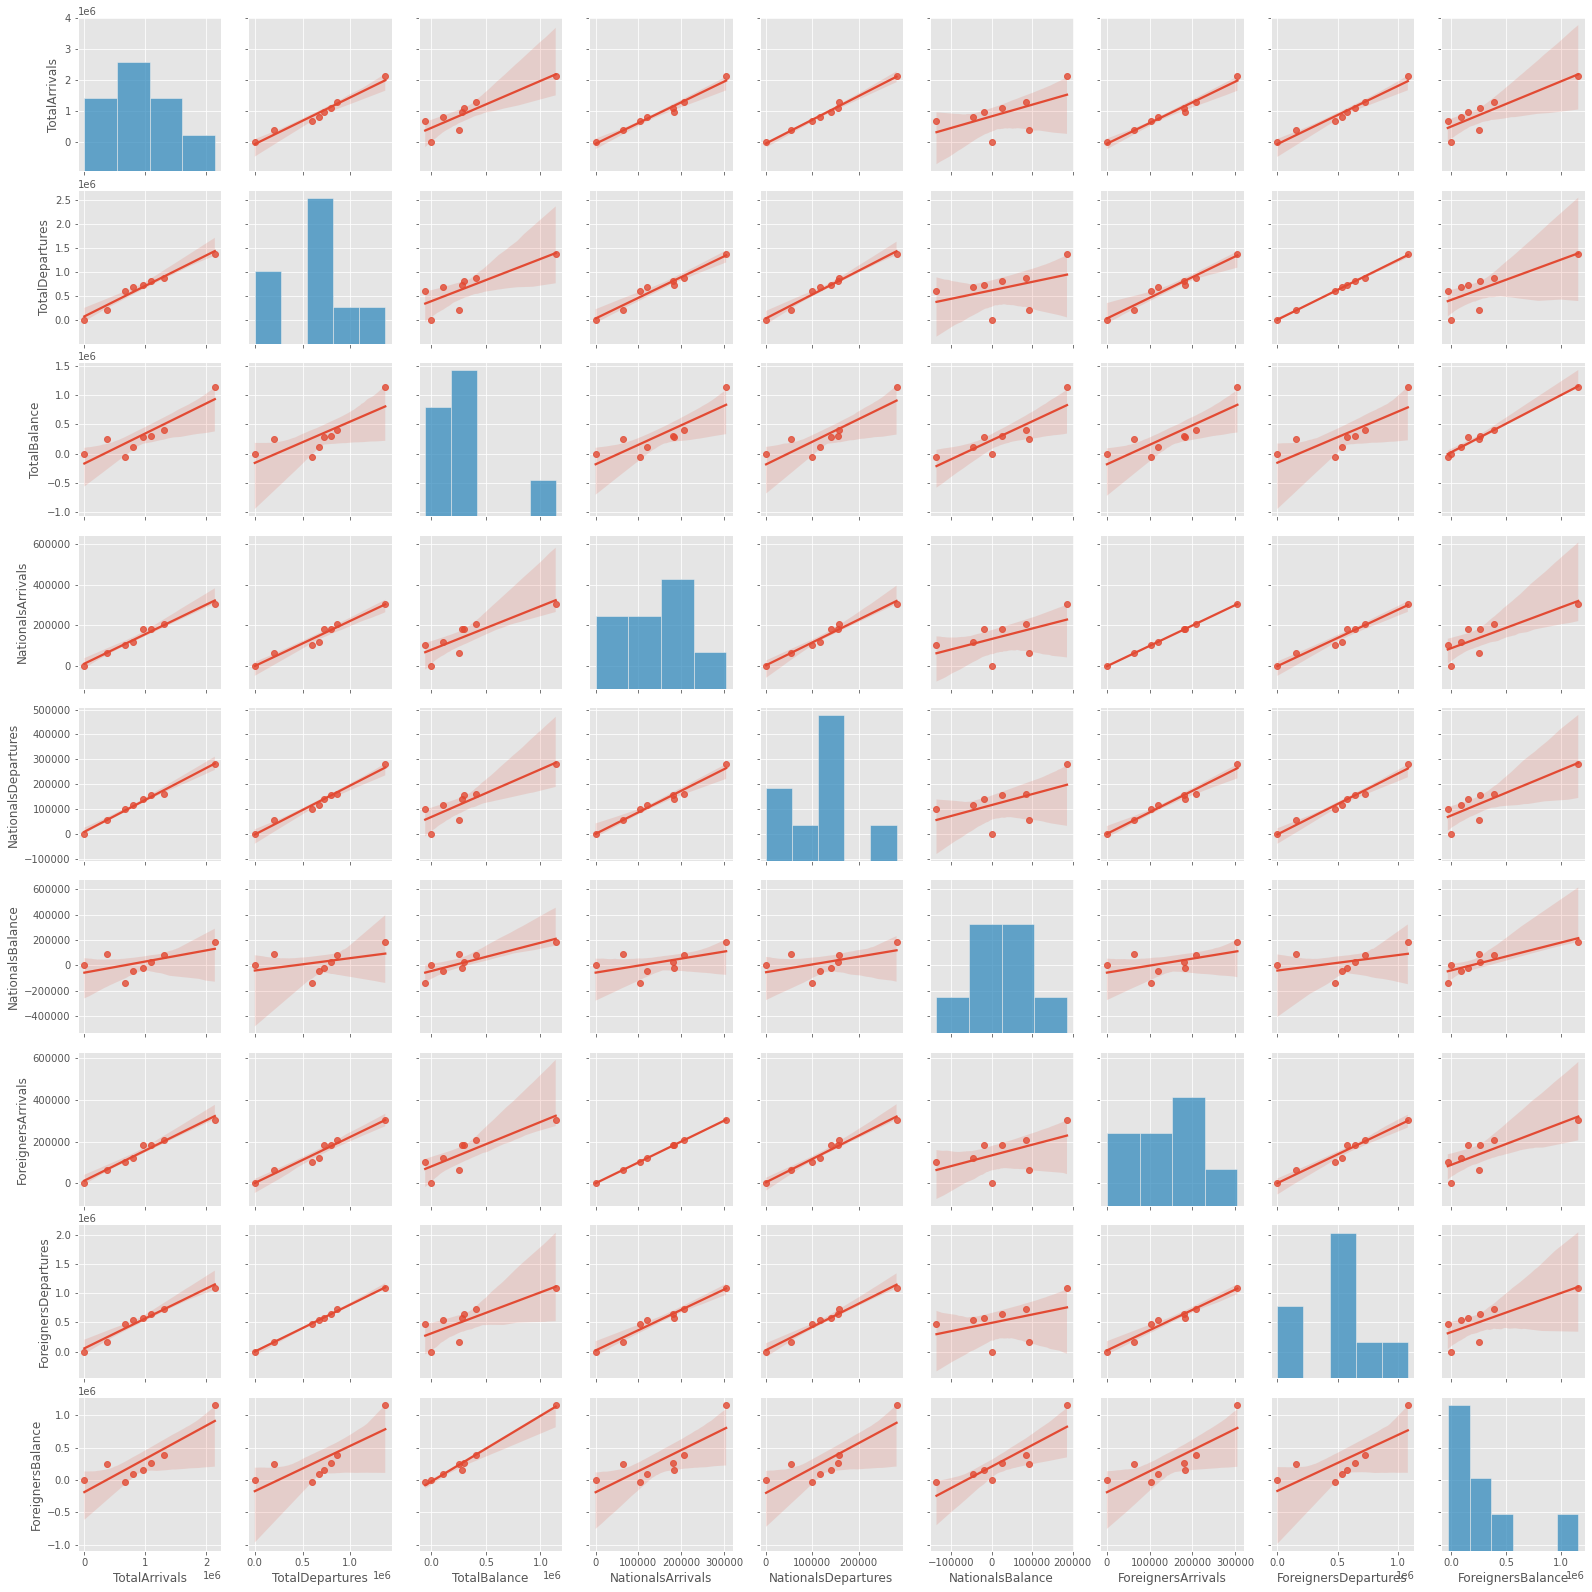

In [19]:
sns.pairplot(df1.drop('Year', axis=1).describe(), kind='reg')

In [20]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def million(x, pos):
  return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)

# Data Visualization

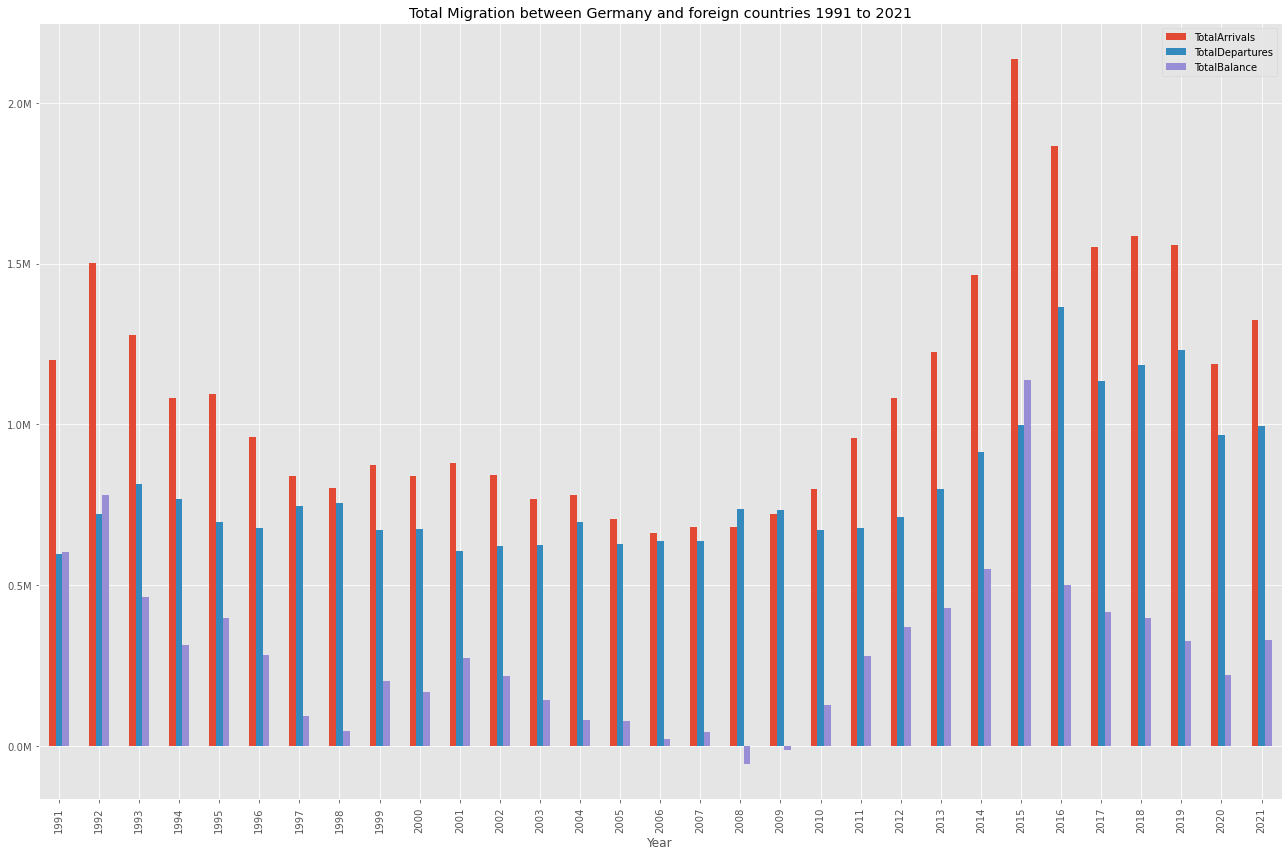

In [21]:
ax1 = df1.set_index('Year').sort_index(ascending=True)[['TotalArrivals', 'TotalDepartures', 'TotalBalance']].plot(kind='bar', figsize=(18, 12))
ax1.set(title='Total Migration between Germany and foreign countries 1991 to 2021')
ax1.yaxis.set_major_formatter(formatter=format_mill)

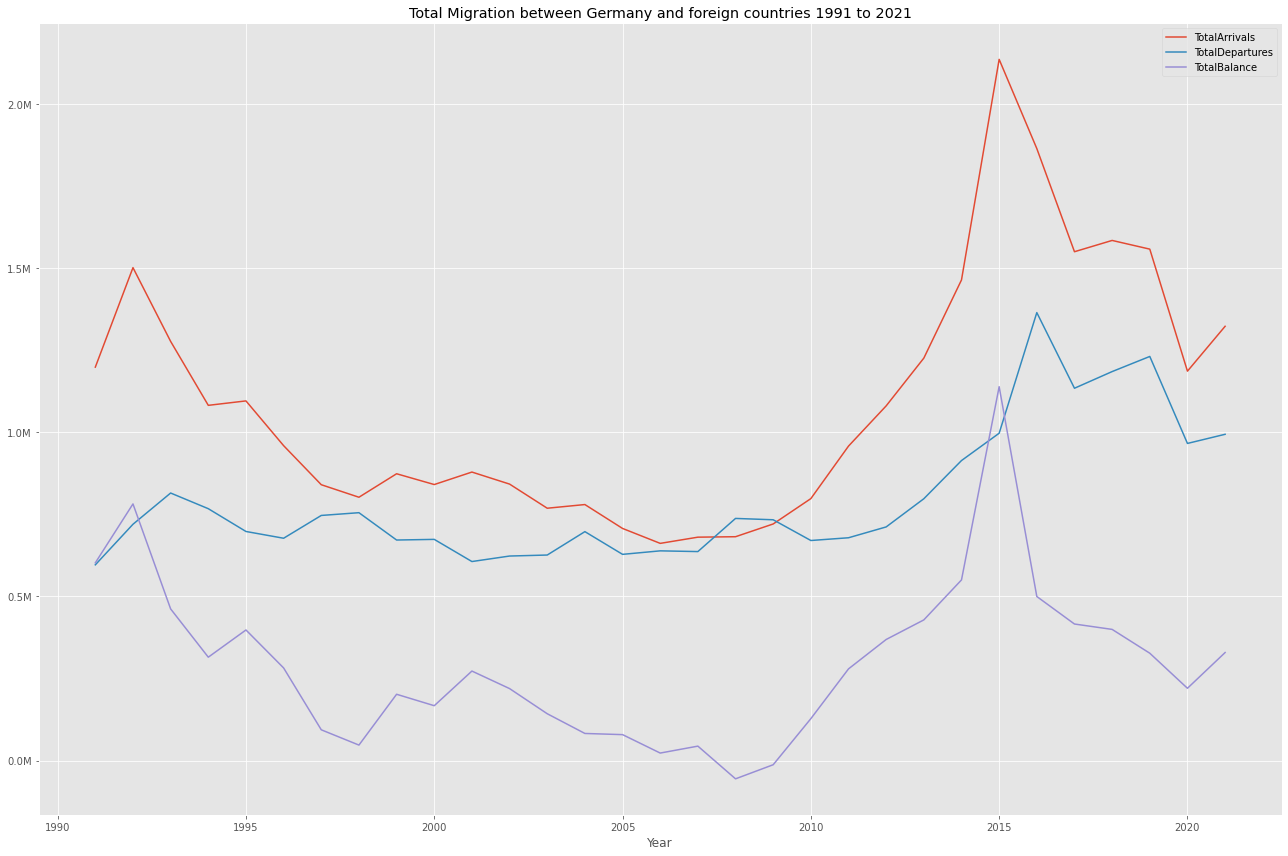

In [22]:
ax2 = df1.set_index('Year').sort_index(ascending=True)[['TotalArrivals', 'TotalDepartures', 'TotalBalance']].plot(figsize=(18, 12))
ax2.set(title='Total Migration between Germany and foreign countries 1991 to 2021')
ax2.yaxis.set_major_formatter(formatter=format_mill)

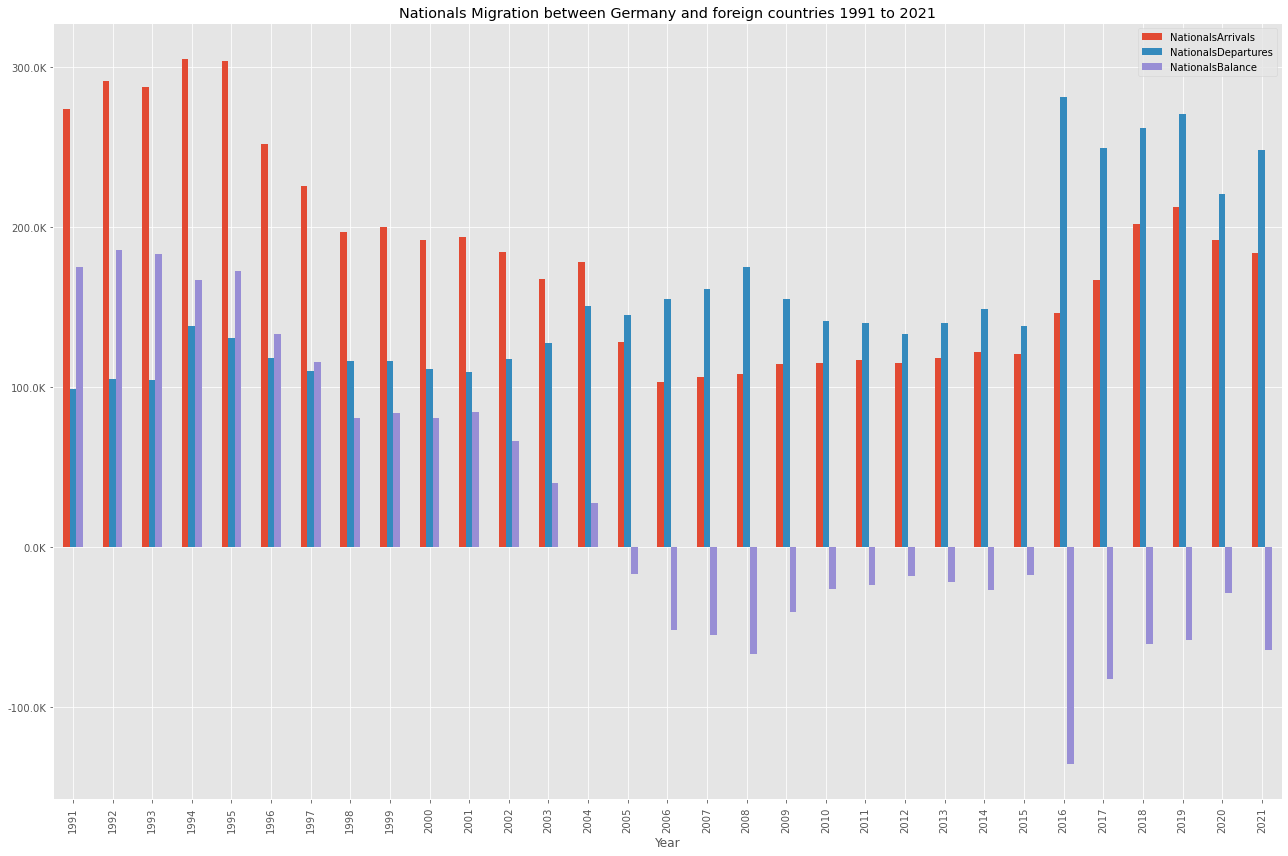

In [23]:
ax3 = df1.set_index('Year').sort_index(ascending=True)[['NationalsArrivals', 'NationalsDepartures', 'NationalsBalance']].plot(kind='bar', figsize=(18, 12))
ax3.set(title='Nationals Migration between Germany and foreign countries 1991 to 2021')
ax3.yaxis.set_major_formatter(formatter=format_tsd)

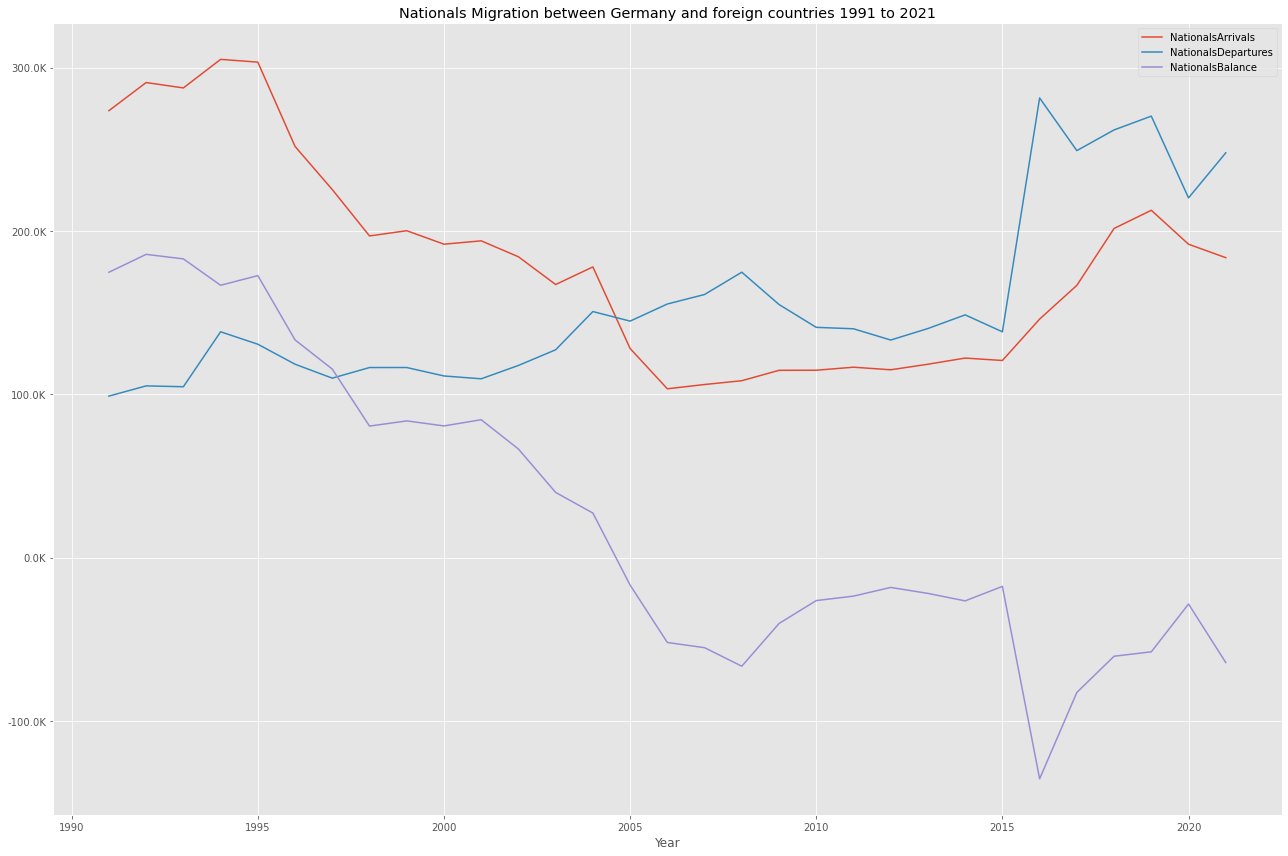

In [24]:
ax4 = df1.set_index('Year').sort_index(ascending=True)[['NationalsArrivals', 'NationalsDepartures', 'NationalsBalance']].plot(figsize=(18, 12))
ax4.set(title='Nationals Migration between Germany and foreign countries 1991 to 2021')
ax4.yaxis.set_major_formatter(formatter=format_tsd)

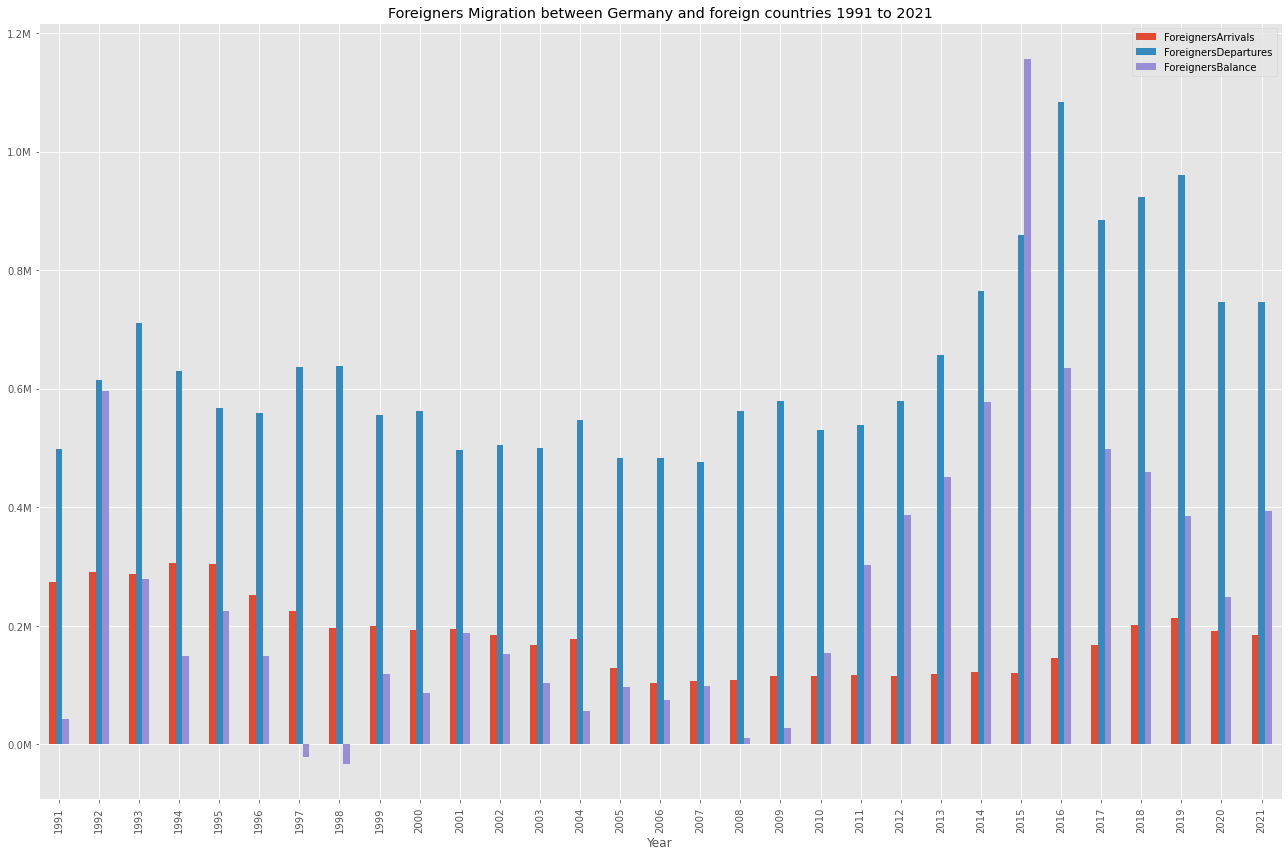

In [25]:
ax5 = df1.set_index('Year').sort_index(ascending=True)[['ForeignersArrivals', 'ForeignersDepartures', 'ForeignersBalance']].plot(kind='bar', figsize=(18, 12))
ax5.set(title='Foreigners Migration between Germany and foreign countries 1991 to 2021')
ax5.yaxis.set_major_formatter(formatter=format_mill)

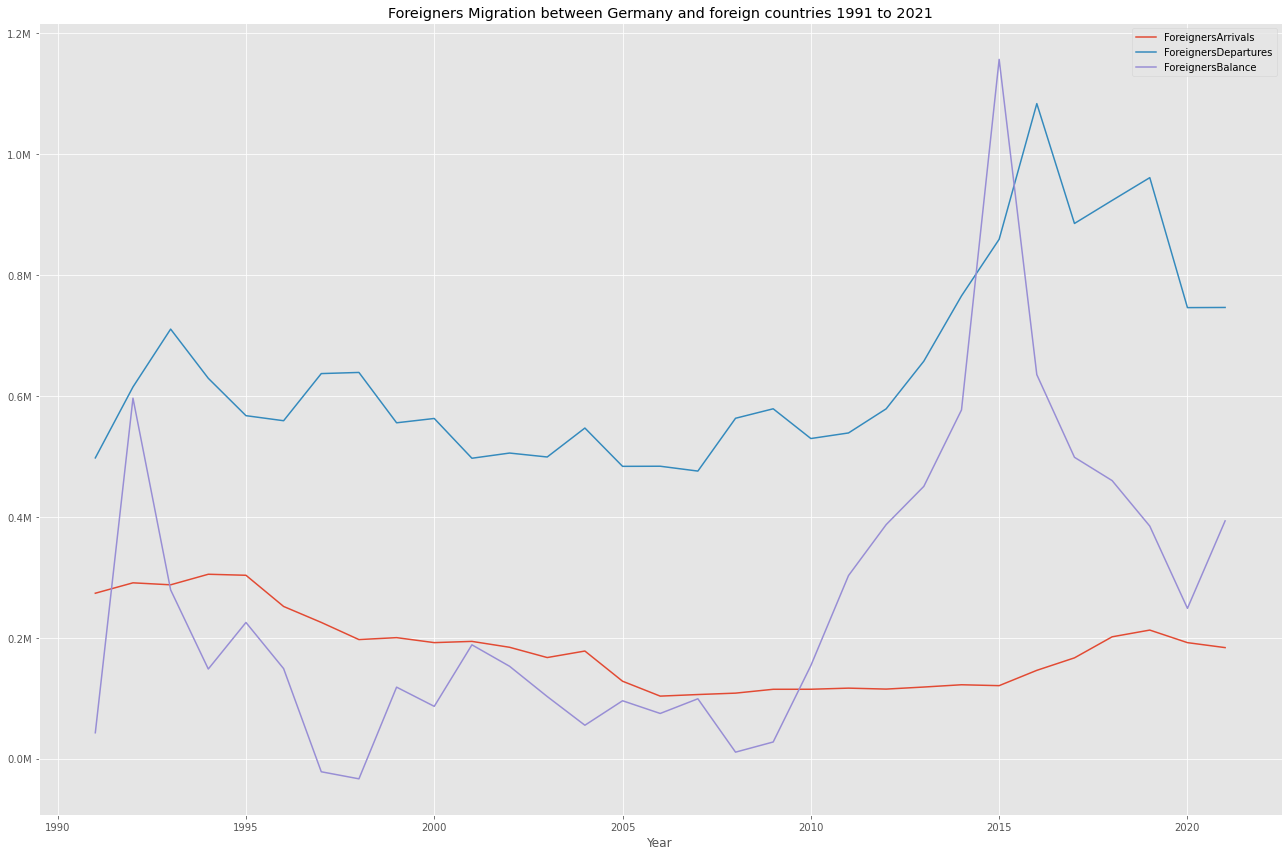

In [26]:
ax6 = df1.set_index('Year').sort_index(ascending=True)[['ForeignersArrivals', 'ForeignersDepartures', 'ForeignersBalance']].plot(figsize=(18, 12))
ax6.set(title='Foreigners Migration between Germany and foreign countries 1991 to 2021')
ax6.yaxis.set_major_formatter(formatter=format_mill)